<a href="https://colab.research.google.com/github/abhi1ranjan/ML-Algorithm_Practise/blob/main/Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC  # Adding Support Vector Classifier as an example
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error


import statistics as st
import warnings
warnings.filterwarnings('ignore')

### Max Voting Technique

In [2]:
import pandas as pd

# Define column names based on the UCI dataset documentation
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Load the data
data = pd.read_csv('/content/processed.cleveland.data', header=None, names=columns)

# Replace '?' with NaN for handling missing values
data.replace('?', pd.NA, inplace=True)

# preprocessing
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['num'], inplace=True)


# Save to CSV
data.to_csv('cleveland_heart_disease.csv', index=False)


In [3]:
# SPLITTING THE DATASET
df = pd.read_csv('/content/cleveland_heart_disease.csv')
x = df.drop('target', axis = 1)
y = df['target']

from sklearn.impute import SimpleImputer

# Define imputer
imputer = SimpleImputer(strategy='mean')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fit and transform the data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

LogisticRegression()

In [4]:
# PREDICTION
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

[0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]


Alternative, we can use Scikit-Learn Voting Classifier

In [5]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7704918032786885

### Averaging

In [6]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

In [7]:
print(finalpred)
# finalpred

[[9.93798426e-01 6.20157392e-03]
 [3.81305751e-01 6.18694249e-01]
 [5.21485905e-01 4.78514095e-01]
 [3.17354499e-01 6.82645501e-01]
 [4.42941195e-01 5.57058805e-01]
 [5.95186838e-01 4.04813162e-01]
 [1.65619643e-03 9.98343804e-01]
 [6.45249979e-01 3.54750021e-01]
 [5.81405701e-04 9.99418594e-01]
 [8.06922456e-01 1.93077544e-01]
 [1.78929201e-01 8.21070799e-01]
 [9.13517771e-01 8.64822292e-02]
 [1.08424699e-01 8.91575301e-01]
 [1.22444537e-01 8.77555463e-01]
 [8.54082977e-01 1.45917023e-01]
 [8.18312730e-01 1.81687270e-01]
 [1.43559405e-01 8.56440595e-01]
 [8.35810211e-01 1.64189789e-01]
 [9.23328139e-01 7.66718606e-02]
 [7.60835342e-01 2.39164658e-01]
 [9.13309505e-01 8.66904954e-02]
 [8.71783776e-01 1.28216224e-01]
 [8.25394909e-01 1.74605091e-01]
 [1.03883092e-01 8.96116908e-01]
 [9.63098720e-01 3.69012799e-02]
 [9.29495250e-01 7.05047500e-02]
 [6.53279026e-01 3.46720974e-01]
 [8.44357450e-02 9.15564255e-01]
 [1.53174968e-01 8.46825032e-01]
 [6.96056244e-02 9.30394376e-01]
 [7.472139

### Weighted Averaging

In [8]:
NewModel1 = DecisionTreeClassifier()
NewModel2 = KNeighborsClassifier()
NewModel3 = LogisticRegression()

NewModel1.fit(x_train,y_train)
NewModel2.fit(x_train,y_train)
NewModel3.fit(x_train,y_train)

Newpred1=NewModel1.predict_proba(x_test)
Newpred2=NewModel2.predict_proba(x_test)
Newpred3=NewModel3.predict_proba(x_test)

finalpred2=(Newpred1*0.3+Newpred2*0.3+Newpred3*0.4)

print(finalpred2)

[[9.92558111e-01 7.44188870e-03]
 [3.97566901e-01 6.02433099e-01]
 [4.85783086e-01 5.14216914e-01]
 [6.60825399e-01 3.39174601e-01]
 [4.51529434e-01 5.48470566e-01]
 [5.74224206e-01 4.25775794e-01]
 [1.98743571e-03 9.98012564e-01]
 [5.94299975e-01 4.05700025e-01]
 [6.97686841e-04 9.99302313e-01]
 [7.88306948e-01 2.11693052e-01]
 [1.94715041e-01 8.05284959e-01]
 [9.16221325e-01 8.37786750e-02]
 [1.10109639e-01 8.89890361e-01]
 [1.26933444e-01 8.73066556e-01]
 [8.64899572e-01 1.35100428e-01]
 [8.21975276e-01 1.78024724e-01]
 [1.32271286e-01 8.67728714e-01]
 [8.42972254e-01 1.57027746e-01]
 [9.27993767e-01 7.20062327e-02]
 [7.73002411e-01 2.26997589e-01]
 [9.15971406e-01 8.40285945e-02]
 [8.66140531e-01 1.33859469e-01]
 [8.30473891e-01 1.69526109e-01]
 [1.04659710e-01 8.95340290e-01]
 [9.55718464e-01 4.42815358e-02]
 [9.35394300e-01 6.46057000e-02]
 [6.63934831e-01 3.36065169e-01]
 [8.13228940e-02 9.18677106e-01]
 [1.43809962e-01 8.56190038e-01]
 [6.35267492e-02 9.36473251e-01]
 [7.566567

### Stacking

In [9]:
def Stacking(model, train, y, test, n_fold):
    folds = StratifiedKFold(n_splits=n_fold, random_state=1, shuffle=True)
    test_pred = np.zeros((test.shape[0], 1))  # Initialize to store average predictions
    train_pred = np.empty((0, 1), float)  # To store predictions for the training data

    for train_indices, val_indices in folds.split(train, y.values):
        x_train, x_val = train.iloc[train_indices], train.iloc[val_indices]
        y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]

        model.fit(x_train, y_train)
        train_pred = np.append(train_pred, model.predict(x_val))  # Store train predictions
        test_pred += model.predict(test).reshape(-1, 1)  # Accumulate test predictions

    # Average the test predictions across folds
    test_pred /= n_fold
    return test_pred, train_pred.reshape(-1, 1)


Now we’ll create 4 base models – decision tree, knn, SVC and RandomForestClassifier.

In [10]:
# Define models
model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(random_state=1)
model4 = SVC(probability=True, random_state=1)  # SVC with probability=True for compatibility

# Ensure x_train and x_test are DataFrames
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)


# Stacking predictions for each model
test_pred1, train_pred1 = Stacking(model=model1, n_fold=10, train=x_train, y=y_train, test=x_test)
test_pred2, train_pred2 = Stacking(model=model2, n_fold=10, train=x_train, y=y_train, test=x_test)
test_pred3, train_pred3 = Stacking(model=model3, n_fold=10, train=x_train, y=y_train, test=x_test)
test_pred4, train_pred4 = Stacking(model=model4, n_fold=10, train=x_train, y=y_train, test=x_test)

In [11]:
# Convert predictions to DataFrames
train_pred1 = pd.DataFrame(train_pred1)
test_pred1 = pd.DataFrame(test_pred1)
train_pred2 = pd.DataFrame(train_pred2)
test_pred2 = pd.DataFrame(test_pred2)
train_pred3 = pd.DataFrame(train_pred3)
test_pred3 = pd.DataFrame(test_pred3)
train_pred4 = pd.DataFrame(train_pred4)
test_pred4 = pd.DataFrame(test_pred4)

# Concatenate predictions to form new datasets
df_train = pd.concat([train_pred1, train_pred2, train_pred3, train_pred4], axis=1)
df_test = pd.concat([test_pred1, test_pred2, test_pred3, test_pred4], axis=1)



Creating a Fifth and final model, logistic regression, on the predictions of four base models.

In [12]:
# Final model (meta-classifier)
meta_model = LogisticRegression(random_state=1)
meta_model.fit(df_train, y_train)

# Evaluate the model
score = meta_model.score(df_test, y_test)
print(f"Stacking model accuracy: {score}")

Stacking model accuracy: 0.2786885245901639


In [13]:
print("Model1 Accuracy:", model1.score(x_test, y_test))
print("Model2 Accuracy:", model2.score(x_test, y_test))
print("Model3 Accuracy:", model3.score(x_test, y_test))
print("Model4 Accuracy:", model4.score(x_test, y_test))


Model1 Accuracy: 0.8032786885245902
Model2 Accuracy: 0.639344262295082
Model3 Accuracy: 0.7704918032786885
Model4 Accuracy: 0.5573770491803278


In [14]:
# Scale features
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Handle imbalance
smote = SMOTE(random_state=1)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

# Hyperparameter tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_balanced, y_train_balanced)
model2 = grid_search_knn.best_estimator_

# # Hyperparameter tuning for GradientBoosting
# param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
# grid_search_gb.fit(x_train_balanced, y_train_balanced)
# model4 = grid_search_gb.best_estimator_

# Add XGBoost model
model5 = XGBClassifier(random_state=1)

# Stacking predictions
test_pred1, train_pred1 = Stacking(model=model1, n_fold=10, train=x_train_balanced, y=y_train_balanced, test=x_test_scaled)
test_pred2, train_pred2 = Stacking(model=model2, n_fold=10, train=x_train_balanced, y=y_train_balanced, test=x_test_scaled)
test_pred3, train_pred3 = Stacking(model=model3, n_fold=10, train=x_train_balanced, y=y_train_balanced, test=x_test_scaled)
# test_pred5, train_pred5 = Stacking(model=model5, n_fold=10, train=x_train_balanced, y=y_train_balanced, test=x_test_scaled)

# # Concatenate predictions
# df_train = pd.concat([pd.DataFrame(train_pred1), pd.DataFrame(train_pred2), pd.DataFrame(train_pred3), pd.DataFrame(train_pred5)], axis=1)
# df_test = pd.concat([pd.DataFrame(test_pred1), pd.DataFrame(test_pred2), pd.DataFrame(test_pred3), pd.DataFrame(test_pred5)], axis=1)

# Concatenate predictions
df_train = pd.concat([pd.DataFrame(train_pred1), pd.DataFrame(train_pred2), pd.DataFrame(train_pred3)], axis=1)
df_test = pd.concat([pd.DataFrame(test_pred1), pd.DataFrame(test_pred2), pd.DataFrame(test_pred3)], axis=1)

# Meta-model
meta_model = LogisticRegression(random_state=1)
meta_model.fit(df_train, y_train_balanced)

# Evaluate the model
score = meta_model.score(df_test, y_test)
print(f"Improved Stacking model accuracy: {score}")


Improved Stacking model accuracy: 0.18032786885245902


In [19]:
# Try simpler models and a RandomForest meta-model for better results

# Define base models (simpler or fewer models)
# model1 = RandomForestClassifier(n_estimators=100, random_state=1)
model2 = XGBClassifier(random_state=1)

# Stacking predictions
test_pred1, train_pred1 = Stacking(model=model1, n_fold=10, train=x_train_scaled, y=y_train_balanced, test=x_test_scaled)
test_pred2, train_pred2 = Stacking(model=model2, n_fold=10, train=x_train_scaled, y=y_train_balanced, test=x_test_scaled)

# Concatenate predictions
df_train = pd.concat([pd.DataFrame(train_pred1), pd.DataFrame(train_pred2)], axis=1)
df_test = pd.concat([pd.DataFrame(test_pred1), pd.DataFrame(test_pred2)], axis=1)

# Use a more powerful meta-model (RandomForest or XGBoost)
meta_model = RandomForestClassifier(n_estimators=100, random_state=1)
meta_model.fit(df_train, y_train_balanced)

# Evaluate the model
score = meta_model.score(df_test, y_test)
print(f"Improved Stacking model accuracy: {score}")


ValueError: Found input variables with inconsistent numbers of samples: [242, 258]

In order to simplify the learning process of these techniques, the stacking model we have created has only two levels. The decision tree and knn models are built at level zero, while a logistic regression model is built at level one. We can create n levels of stacking model.

### Blending

Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.

In [15]:
# Split the data into train/validation/test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Handle missing values with imputation (applied to all feature sets)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_val_imputed = pd.DataFrame(imputer.transform(x_val), columns=x_val.columns)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# Train base models on the imputed training data
model1 = DecisionTreeClassifier()
model1.fit(x_train_imputed, y_train)
val_pred1 = model1.predict(x_val_imputed)
test_pred1 = model1.predict(x_test_imputed)

model2 = KNeighborsClassifier()
model2.fit(x_train_imputed, y_train)
val_pred2 = model2.predict(x_val_imputed)
test_pred2 = model2.predict(x_test_imputed)

# Combine validation predictions with original validation features
df_val = pd.concat([pd.DataFrame(x_val_imputed), pd.DataFrame(val_pred1, columns=['model1_pred']),
                    pd.DataFrame(val_pred2, columns=['model2_pred'])], axis=1)

df_test = pd.concat([pd.DataFrame(x_test_imputed), pd.DataFrame(test_pred1, columns=['model1_pred']),
                     pd.DataFrame(test_pred2, columns=['model2_pred'])], axis=1)

# Ensure column names are strings
df_val.columns = df_val.columns.astype(str)
df_test.columns = df_test.columns.astype(str)

# Train the meta-model (Logistic Regression) on the validation set predictions
meta_model = LogisticRegression()
meta_model.fit(df_val, y_val.reset_index(drop=True))

# Make predictions on the test set using the trained meta-model
final_pred = meta_model.predict(df_test)

# Evaluate the performance of the final model
accuracy = accuracy_score(y_test.reset_index(drop=True), final_pred)
print(f"Blending model accuracy: {accuracy}")

Blending model accuracy: 0.8695652173913043


In [16]:
print(df_test.shape)
print(df_val.shape)
print(y_test.shape)
print(y_val.shape)

(46, 15)
(45, 15)
(46,)
(45,)


++++++++++++++++++++++++++++++++++=====================================++++++++++++++++++++++++++++++++++

Now we code some bagging and boosting algorithm. I will use loan predictor dataset.

In [17]:
#reading the dataset
df_loan=pd.read_csv("/content/train.csv")

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
#filling missing values
df_loan['Gender'].fillna('Male', inplace=True)

In [22]:
#split dataset into train and test
train, test = train_test_split(df_loan, test_size=0.3, random_state=0)

x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']

x_test=test.drop('Loan_Status',axis=1)
y_test=test['Loan_Status']

# #create dummies
# x_train=pd.get_dummies(x_train)
# x_test=pd.get_dummies(x_test)

In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 351 to 559
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            429 non-null    object 
 1   Gender             429 non-null    object 
 2   Married            426 non-null    object 
 3   Dependents         417 non-null    object 
 4   Education          429 non-null    object 
 5   Self_Employed      403 non-null    object 
 6   ApplicantIncome    429 non-null    int64  
 7   CoapplicantIncome  429 non-null    float64
 8   LoanAmount         412 non-null    float64
 9   Loan_Amount_Term   418 non-null    float64
 10  Credit_History     392 non-null    float64
 11  Property_Area      429 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 43.6+ KB


### Bagging meta-estimator
Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions.

#### Parameters used in the  algorithms
* estimator:
It defines the base estimator to fit on random subsets of the dataset.
When nothing is specified, the base estimator is a decision tree.
* n_estimators:
It is the number of base estimators to be created. The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.
* max_samples:
This parameter controls the size of the subsets. It is the maximum number of samples to train each base estimator.
* max_features:
Controls the number of features to draw from the whole dataset. It defines the maximum number of features required to train each base estimator.
* n_jobs:
The number of jobs to run in parallel. Set this value equal to the cores in your system. If -1, the number of jobs is set to the number of cores.
* random_state:
It specifies the method of random split. When random state value is same for two models, the random selection is same for both models. This parameter is useful when you want to compare different models.

In [24]:
# Define categorical and numerical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Drop Loan_ID and prepare the data
x_train = x_train.drop(columns=['Loan_ID'])
x_test = x_test.drop(columns=['Loan_ID'])

# Preprocessing pipeline
categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('onehot', OneHotEncoder(drop='first'))  # Convert to numeric
])

numerical_preprocessor = SimpleImputer(strategy='mean')  # Fill missing with mean

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ]
)

In [25]:
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the BaggingClassifier pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1), random_state=1))
])

# Fit the model
pipeline.fit(x_train, y_train_encoded)

# Make predictions
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.772972972972973


### Random Forest Classifier

Random Forest is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Parameters
* n_estimators:
It defines the number of decision trees to be created in a random forest. Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
* criterion:
It defines the function that is to be used for splitting. The function measures the quality of a split for each feature and chooses the best split.
* max_features :
It defines the maximum number of features allowed for the split in each decision tree. Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.
* max_depth:
Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.
* min_samples_split:
Used to define the minimum number of samples required in a leaf node before a split is attempted. If the number of samples is less than the required number, the node is not split.
* min_samples_leaf:
This defines the minimum number of samples required to be at a leaf node.
Smaller leaf size makes the model more prone to capturing noise in train data.
* max_leaf_nodes:
This parameter specifies the maximum number of leaf nodes for each tree. The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.
* n_jobs:
This indicates the number of jobs to run in parallel. Set value to -1 if you want it to run on all cores in the system.
* random_state:
This parameter is used to define the random selection. It is used for comparison between various models.

In [26]:
# Read the train and test datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# View the top 3 rows of the dataset
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [27]:
# Shape of the datasets
print('\nShape of training data :', train_data.shape)
print('\nShape of testing data :', test_data.shape)


Shape of training data : (614, 13)

Shape of testing data : (367, 12)


In [28]:
# Separate the target variable from the training data
train_x = train_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
train_y = train_data['Loan_Status']

# Drop the Loan_ID column from the testing data
test_x = test_data.drop(columns=['Loan_ID'], axis=1)

# Ensure the columns in train_x and test_x are consistent
missing_cols_in_test = set(train_x.columns) - set(test_x.columns)
for col in missing_cols_in_test:
    test_x[col] = 0  # Add missing columns with default values

# Align the column order of test_x to match train_x
test_x = test_x[train_x.columns]

# Check the updated shapes
print('\nUpdated Shape of train_x:', train_x.shape)
print('Updated Shape of test_x:', test_x.shape)


Updated Shape of train_x: (614, 11)
Updated Shape of test_x: (367, 11)


In [29]:
# Separate categorical and numerical columns
categorical_cols = train_x.select_dtypes(include=['object']).columns
numerical_cols = train_x.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values
# For numerical columns, use mean imputation
imputer_num = SimpleImputer(strategy='mean')
train_x[numerical_cols] = imputer_num.fit_transform(train_x[numerical_cols])
test_x[numerical_cols] = imputer_num.transform(test_x[numerical_cols])

# For categorical columns, use most frequent imputation
imputer_cat = SimpleImputer(strategy='most_frequent')
train_x[categorical_cols] = imputer_cat.fit_transform(train_x[categorical_cols])
test_x[categorical_cols] = imputer_cat.transform(test_x[categorical_cols])

In [30]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [31]:
# Encode categorical variables
encoder = LabelEncoder()

# Encode target variable (Loan_Status)
train_y = encoder.fit_transform(train_y)

# Apply encoding to categorical features in train_x and test_x
for col in categorical_cols:
    train_x[col] = encoder.fit_transform(train_x[col])
    test_x[col] = encoder.transform(test_x[col])

In [32]:
# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)

# Fit the model with the training data
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=10, random_state=1)

In [33]:
# Number of trees used
print('\nNumber of Trees used:', model.n_estimators)


Number of Trees used: 100


In [34]:
# Predict the target on the training data
predict_train = model.predict(train_x)
print('\nPredictions on training data:', predict_train)


Predictions on training data: [1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 

In [35]:
# Accuracy on training data
accuracy_train = accuracy_score(train_y, predict_train)
print('\nAccuracy on training data:', accuracy_train)


Accuracy on training data: 0.9234527687296417


In [36]:
# Predict the target on the testing data
predict_test = model.predict(test_x)
print(predict_test)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
# Test data lacks Loan_Status for accuracy measurement, so just show predictions
print('\nPredictions on testing data:', encoder.inverse_transform(predict_test))


Predictions on testing data: ['Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Rural' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Rural' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Rural' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Rural'
 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Rural' 'Semiurban' 'Semiurban' 'Rural' 'Semiurban'
 'Semiurban' 'Semiurban' 'Semiurban' 'Rural' 'Semiurban' 'Semiurban'
 'Rural' 'Rural' 'Semiurban' 'Rural' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban' 'Semiurban'
 'Semiurban' 'Rural' 'Semiurban' 'Rural' 'Semiurb

In [38]:
predictions = encoder.inverse_transform(predict_test)

# Create a DataFrame with 'Loan_ID' and the predicted 'Loan_Status'
submission = pd.DataFrame({
    'Loan_ID': test_data['Loan_ID'],  # Assuming 'Loan_ID' exists in the test data
    'Loan_Status': predictions
})

# Save the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)

### AdaBoost

Parameters
* base_estimators:
It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.
* n_estimators:
It defines the number of base estimators. The default value is 10, but you should keep a higher value to get better performance.
* learning_rate:
This parameter controls the contribution of the estimators in the final combination. There is a trade-off between learning_rate and n_estimators.
* max_depth:
Defines the maximum depth of the individual estimator. Tune this parameter for best performance.
* n_jobs
Specifies the number of processors it is allowed to use. Set value to -1 for maximum processors allowed.
* random_state :
An integer value to specify the random data split. A definite value of random_state will always produce same results if given with same parameters and training data.

In [40]:
# Separate numeric and categorical columns
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

In [41]:
# Impute numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
x_train[numeric_cols] = numeric_imputer.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = numeric_imputer.transform(x_test[numeric_cols])

# Impute categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
x_train[categorical_cols] = categorical_imputer.fit_transform(x_train[categorical_cols])
x_test[categorical_cols] = categorical_imputer.transform(x_test[categorical_cols])

In [42]:
# Convert categorical columns to numeric using one-hot encoding or label encoding
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Ensure both train and test sets have the same columns after encoding
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [43]:
# Train the AdaBoost model
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [44]:
# Evaluate the model
train_accuracy = model.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Predict on the test set
y_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8484848484848485
Test Accuracy: 0.8162162162162162


In [46]:
# Encode the target variable if it's categorical
if y_train.dtype == 'object':
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

In [47]:
# Train the AdaBoost Regressor
model = AdaBoostRegressor(random_state=1)
model.fit(x_train, y_train)

# Evaluate the model
train_score = model.score(x_train, y_train)
print(f'Training R^2 Score: {train_score}')

Training R^2 Score: 0.2815426795220062


In [48]:
# Predict on the test set
y_pred = model.predict(x_test)

# Decode predictions if target was encoded
if 'label_encoder' in locals():
    y_pred = label_encoder.inverse_transform(y_pred.round().astype(int))

In [52]:
# Evaluate predictions
test_score = model.score(x_test, y_test)
print(f'Test R^2 Score: {test_score}')

# Optional: Compute Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

Test R^2 Score: 0.12398171296478111


### Gradient Boosting (GBM)

GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree. This algorithm works for both regression and classification problems.

Parameters
* min_samples_split
  - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
  - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
* min_samples_leaf
  - Defines the minimum samples required in a terminal or leaf node.
  - Generally, lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in the majority will be very small.
* min_weight_fraction_leaf
  - Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
* max_depth
  - The maximum depth of a tree.
  - Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
  - Should be tuned using CV.
* max_leaf_nodes
  - The maximum number of terminal nodes or leaves in a tree.
  - It can define max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
  - If this is defined, GBM will ignore max_depth.
* max_features
  - The number of features to consider while searching for the best split. These will be randomly selected.
  - As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total number of features.
  - Higher values can lead to over-fitting but it generally depends on a case to case scenario.

In [57]:
Clsmodel= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
Clsmodel.fit(x_train, y_train)
print(f"Test accuracy: {Clsmodel.score(x_test,y_test)}")


Test accuracy: 0.8216216216216217


In [58]:
RegModel= GradientBoostingRegressor()
RegModel.fit(x_train, y_train)
print(f"Test accuracy: {RegModel.score(x_test,y_test)}")

Test accuracy: 0.22716181451530293


### XGBoost (extreme Gradient Boosting)

XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

Parameters
* nthread
  - This is used for parallel processing and the number of cores in the system should be entered..
  - If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.
* eta
  - Analogous to learning rate in GBM.
  - Makes the model more robust by shrinking the weights on each step.
* min_child_weight
  - Defines the minimum sum of weights of all observations required in a child.
  - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
* max_depth
  - It is used to define the maximum depth.
  - Higher depth will allow the model to learn relations very specific to a particular sample.
* max_leaf_nodes
  - The maximum number of terminal nodes or leaves in a tree.
  - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
  - If this is defined, GBM will ignore max_depth.
* gamma
  - A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
  - Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
* subsample
  - Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
  - Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.
* colsample_bytree
  - It is similar to max_features in GBM.
  - Denotes the fraction of columns to be randomly sampled for each tree.

In [61]:
XGClsModel=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGClsModel.fit(x_train, y_train)
print(f"Test accuracy: {XGClsModel.score(x_test,y_test)}")

Test accuracy: 0.827027027027027


In [62]:
XGRegModel=xgb.XGBRegressor()
XGRegModel.fit(x_train, y_train)
print(f"Test accuracy: {XGRegModel.score(x_test,y_test)}")

Test accuracy: 0.08239108324050903


### LightGBM

Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern.

Leaf-wise growth may cause over-fitting on smaller datasets but that can be avoided by using the ‘max_depth’ parameter for learning.

In [79]:
# Replace whitespaces in feature names
x_train.columns = x_train.columns.str.replace(' ', '_')
x_test.columns = x_test.columns.str.replace(' ', '_')


# Scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define parameters
params = {
    'learning_rate': 0.1,
    'max_depth': -1,
    'num_leaves': 50,
    'min_data_in_leaf': 10,
    'min_gain_to_split': 0.0,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': True,
    'feature_pre_filter': False,
    'verbose': 1,  # Control verbosity (-1 = silent, 1 = verbose)
    'early_stopping': 50  # Early stopping rounds
}

# Define parameters
# params = {
#     'objective': 'binary',
#     'metric': 'binary_error',  # You can change this to 'binary_logloss' or another appropriate metric
#     'learning_rate': 0.01,

# }

In [74]:
# Convert to DataFrame if needed
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

# Fill missing values
x_train_scaled.fillna(-999, inplace=True)
x_test_scaled.fillna(-999, inplace=True)

# Convert back to NumPy if required
x_train_scaled = x_train_scaled.to_numpy()
x_test_scaled = x_test_scaled.to_numpy()

In [80]:
# Split data into training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

# Create LightGBM datasets
train_data = lgb.Dataset(x_train_split, label=y_train_split)
val_data = lgb.Dataset(x_val, label=y_val, reference=train_data)

# Train the model
GBM_model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[val_data],   # Add validation data
    valid_names=['valid'],  # Name the validation dataset
    #verbose_eval=10         # Logs every 10 rounds
)

[LightGBM] [Info] Number of positive: 230, number of negative: 113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 343, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670554 -> initscore=0.710691
[LightGBM] [Info] Start training from score 0.710691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [81]:
# Predict probabilities
y_pred = GBM_model.predict(x_test)

# Apply classification threshold
y_pred_binary = (y_pred >= 0.5).astype(int)

# Print predictions
print('Predicted classes:', y_pred_binary)

Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

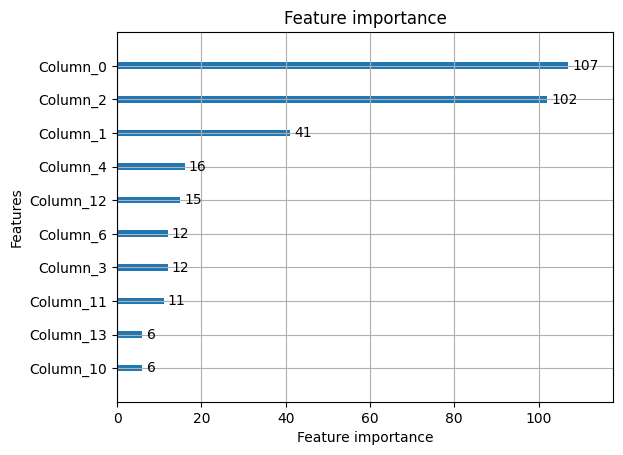

In [82]:
# Plot feature importance
lgb.plot_importance(GBM_model, max_num_features=10)


In [83]:
train_data=lgb.Dataset(x_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 14
[LightGBM] [Info] Start training from score 0.671329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i